# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegressionCV

In [2]:
url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df = pd.read_csv(url, index_col=0)
train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [3]:
train_df.shape

(6000, 61)

In [4]:
train_df.Popular.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
1,3000,0.5
0,3000,0.5


In [5]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [6]:
y.mean()

0.5

In [7]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

#### Regresión logistica

In [8]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)  
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred)) 
print("f1-Score: ",metrics.f1_score(y_test,y_pred)) 

Accuracy:  0.6273333333333333
f1-Score:  0.6104529616724739


#### Arbol

In [9]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)  
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred)) 
print("f1-Score: ",metrics.f1_score(y_test,y_pred)) 


Accuracy:  0.6413333333333333
f1-Score:  0.6072992700729928


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

### 300 Bagged samples

In [10]:
np.random.seed(123)
n_samples = X_train.shape[0]
n_B = 300

samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
len(samples)

300

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [11]:
from sklearn.tree import DecisionTreeClassifier

y_pred_df = pd.DataFrame(index=y_test.index, columns=[list(range(n_B))])

models = {}
for i in range(100):
    models[i] = DecisionTreeClassifier(max_depth=None, random_state=123)
    models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    y_pred_df.iloc[:, i] = models[i].predict(X_test)
    
for i in range(100,200):
    models[i] = DecisionTreeClassifier(max_depth=2, random_state=123)
    models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    y_pred_df.iloc[:, i] =models[i].predict(X_test) 
    
for i in range(200,300):
    models[i] =LogisticRegression( random_state=123)
    models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    y_pred_df.iloc[:, i] = models[i].predict(X_test) 

    

In [12]:
y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2520,1,0,0,0,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,1,0,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0,0.5,'f1-score')

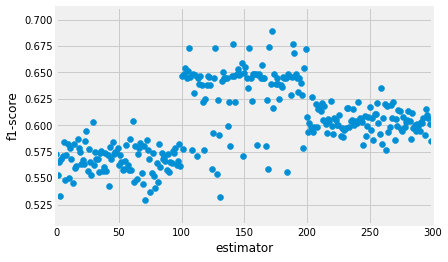

In [13]:
f1_score=[]
for i in range(n_B):
    f1_score.append( metrics.f1_score(y_pred_df[i], y_test))

y_pred_df
%matplotlib inline
plt.scatter(range(n_B), f1_score)
plt.xlim([0, n_B])
#plt.title('f1-score')
plt.xlabel('estimator')
plt.ylabel('f1-score')

# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

Ensemble using majority voting

In [14]:
y_pred = (y_pred_df.sum(axis=1) >= (n_B / 2)).astype(np.int)

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [15]:
print("F1-score:",metrics.f1_score(y_pred, y_test))
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))

F1-score: 0.6231086657496561
Accuracy: 0.6346666666666667


# Exercise 9.4

Estimate the probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [16]:
y_pred.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,802,0.534667
1,698,0.465333


La probabilidad de que sea 1 es 0.465333

In [17]:
threshold =np.arange(0.0,1, 0.01)
f1_score=[]

for t in threshold:
    y_pred = (y_pred_df.sum(axis=1)/n_B >=t ).astype(np.int)
    f1_score.append([ t, metrics.f1_score(y_pred, y_test)])
    
f1_score=pd.DataFrame(f1_score, columns=['threshold', 'f1_score'])
max_f1_score=f1_score.loc[f1_score['f1_score'].idxmax()]

print('Max score:\n',max_f1_score)

Max score:
 threshold    0.130000
f1_score     0.710005
Name: 13, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Text(0,0.5,'f1-Score')

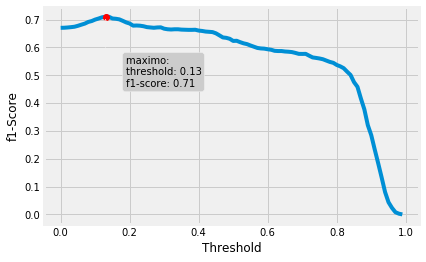

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot( f1_score['threshold'],f1_score['f1_score'])
plt.plot( max_f1_score['threshold'],max_f1_score['f1_score'],'ro')
plt.annotate('maximo: \n'+
            'threshold: '+str(round(max_f1_score['threshold'],3))+'\n'+
             'f1-score: '+str(round(max_f1_score['f1_score'],3)),
             xy=( max_f1_score['threshold'],max_f1_score['f1_score']),
             xycoords='data',
             xytext=(20, -70), textcoords='offset points', 
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.xlabel('Threshold')
plt.ylabel('f1-Score')

# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [19]:
# Select each oob sample
samples_oob = []
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

#Estimate the oob error of each classifier
errors = np.zeros(n_B)
for i in range(n_B):
    y_pred_ = models[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    
# Define alpha    
alpha = (1 - errors) / (1 - errors).sum()
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)

# Give weihgts to eacha model
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)

# Calculate metrics
print("F1-score:",metrics.f1_score(y_pred, y_test))
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))

F1-score: 0.6248275862068966
Accuracy: 0.6373333333333333


Text(0.5,1,'OOB error of each model')

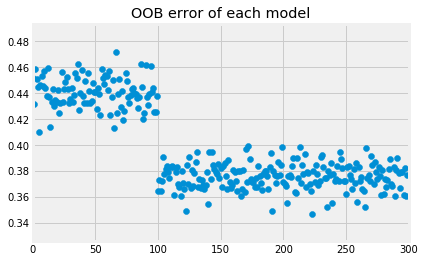

In [20]:
%matplotlib inline
plt.scatter(range(n_B), errors)
plt.xlim([0, n_B])
plt.title('OOB error of each model')

# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [21]:
y_pred.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,806,0.537333
1,694,0.462667


La probabilidad  generada por el weighted voting es 0.462 

In [22]:
threshold =np.arange(0.0,1, 0.01)
f1_score=[]

for  t in threshold:
    y_pred = (weighted_sum_1 >=t ).astype(np.int)
    f1_score.append([ t, metrics.f1_score(y_pred, y_test)])
    
f1_score=pd.DataFrame(f1_score, columns=['threshold', 'f1_score'])
max_f1_score=f1_score.loc[f1_score['f1_score'].idxmax()]

print('Max score:\n',max_f1_score)

Max score:
 threshold    0.120000
f1_score     0.710005
Name: 12, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Text(0,0.5,'f1-Score')

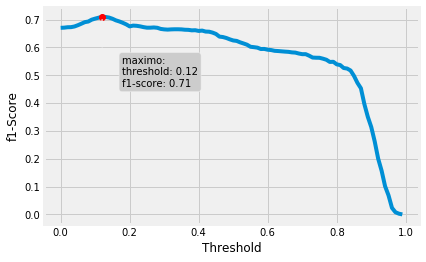

In [23]:
plt.plot( f1_score['threshold'],f1_score['f1_score'])
plt.plot( max_f1_score['threshold'],max_f1_score['f1_score'],'ro')
plt.annotate('maximo: \n'+
            'threshold: '+str(round(max_f1_score['threshold'],3))+'\n'+
             'f1-score: '+str(round(max_f1_score['f1_score'],3)),
             xy=( max_f1_score['threshold'],max_f1_score['f1_score']),
             xycoords='data',
             xytext=(20, -70), textcoords='offset points', 
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.xlabel('Threshold')
plt.ylabel('f1-Score')

# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [24]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_B)))
for i in range(n_B):
    X_train_2[i] = models[i].predict(X_train)
    

In [25]:
X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2420,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
324,0,0,0,0,0,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
5863,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,0,1
86,0,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1


In [26]:
lr = LogisticRegressionCV(cv = 5 , random_state=123)
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=123,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [27]:
lr.coef_

array([[0.03403429, 0.0350011 , 0.03267856, 0.03395329, 0.03377513,
        0.03560061, 0.03385766, 0.03353615, 0.03337019, 0.03349208,
        0.0342545 , 0.033679  , 0.03313517, 0.03423183, 0.03522429,
        0.03488691, 0.03324331, 0.03434959, 0.03374365, 0.03395967,
        0.03427412, 0.0340681 , 0.03380797, 0.03331874, 0.03389498,
        0.03368914, 0.03279008, 0.03249876, 0.03394359, 0.03440199,
        0.03381189, 0.03378515, 0.03396503, 0.03413647, 0.03378947,
        0.03428997, 0.03289843, 0.03455405, 0.03365308, 0.03301379,
        0.03385852, 0.03411212, 0.03330383, 0.03419077, 0.03347403,
        0.03364798, 0.03450809, 0.03422236, 0.03317301, 0.03421045,
        0.0332912 , 0.0347952 , 0.03383861, 0.03402168, 0.03499459,
        0.03363203, 0.03316633, 0.0339944 , 0.03319419, 0.03340281,
        0.03384595, 0.03354872, 0.03412639, 0.03423266, 0.03368254,
        0.03532226, 0.03295336, 0.03461909, 0.03407614, 0.03369923,
        0.03378616, 0.03382275, 0.03479487, 0.03

In [28]:
y_pred = lr.predict(y_pred_df)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6504279131007242, 0.646)

In [29]:
y_pred = np.where(lr.predict_proba(y_pred_df)[:,1] >= 0.5, 1, 0)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6504279131007242, 0.646)

In [30]:
threshold =np.arange(0.0,1, 0.01)
f1_score=[]

for  t in threshold:
    y_pred = np.where(lr.predict_proba(y_pred_df)[:,1] >= t, 1, 0)
    f1_score.append([ t, metrics.f1_score(y_pred, y_test)])
    
f1_score=pd.DataFrame(f1_score, columns=['threshold', 'f1_score'])
max_f1_score=f1_score.loc[f1_score['f1_score'].idxmax()]
print('Max score:\n',max_f1_score)

Max score:
 threshold    0.320000
f1_score     0.711744
Name: 32, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Text(0,0.5,'f1-Score')

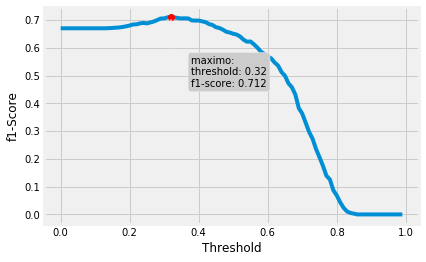

In [31]:
plt.plot( f1_score['threshold'],f1_score['f1_score'])
plt.plot( max_f1_score['threshold'],max_f1_score['f1_score'],'ro')
plt.annotate('maximo: \n'+
            'threshold: '+str(round(max_f1_score['threshold'],3))+'\n'+
             'f1-score: '+str(round(max_f1_score['f1_score'],3)),
             xy=( max_f1_score['threshold'],max_f1_score['f1_score']),
             xycoords='data',
             xytext=(20, -70), textcoords='offset points', 
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.xlabel('Threshold')
plt.ylabel('f1-Score')